Importing libraries

In [54]:
import pandas as pd
import numpy as np

Data loading

In [55]:
data=pd.read_csv("taxi_fare.csv")

In [56]:
data.shape

(212345, 18)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [58]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [59]:
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [60]:
data.duplicated().sum()

0

In [61]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [62]:
data.nunique()

VendorID                     2
tpep_pickup_datetime     61208
tpep_dropoff_datetime    63607
passenger_count              7
pickup_longitude         14794
pickup_latitude          30504
RatecodeID                   7
store_and_fwd_flag           2
dropoff_longitude        18029
dropoff_latitude         34903
payment_type                 4
fare_amount                341
extra                        5
mta_tax                      3
tip_amount                1224
tolls_amount               109
improvement_surcharge        3
total_amount              2727
dtype: int64

In [63]:
def haversine(lon1,lat1,lon2,lat2):
    R = 6371
    lon1,lat1,lon2,lat2=map(np.radians,[lon1,lat1,lon2,lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

data["trip_distance"]=haversine(data["pickup_longitude"],data["pickup_latitude"],data["dropoff_longitude"],data["dropoff_latitude"])

In [64]:
import pytz

data['pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['pickup_datetime_edt'] = data['pickup_datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
data['pickup_day'] = data['pickup_datetime_edt'].dt.day_name()
data['is_weekend'] = data['pickup_datetime_edt'].dt.weekday >= 5
data['pickup_hour'] = data['pickup_datetime_edt'].dt.hour
data['am_pm'] = data['pickup_hour'].apply(lambda x: 'AM' if x < 12 else 'PM')
data['is_night'] = data['pickup_hour'].apply(lambda x: 1 if (x >= 22 or x < 6) else 0)
data['is_rush_hour'] = data['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)

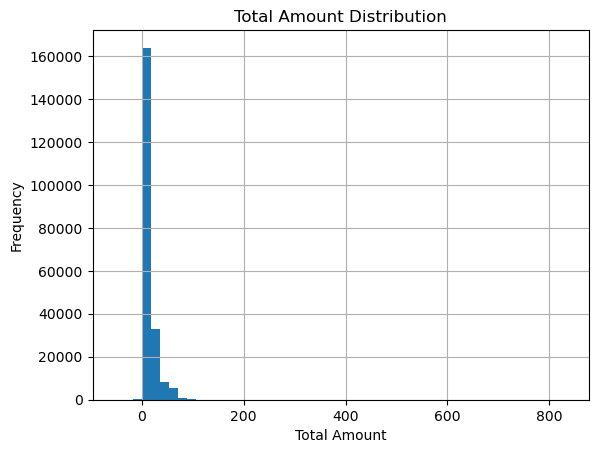

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

data['total_amount'].hist(bins=50)
plt.title('Total Amount Distribution')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

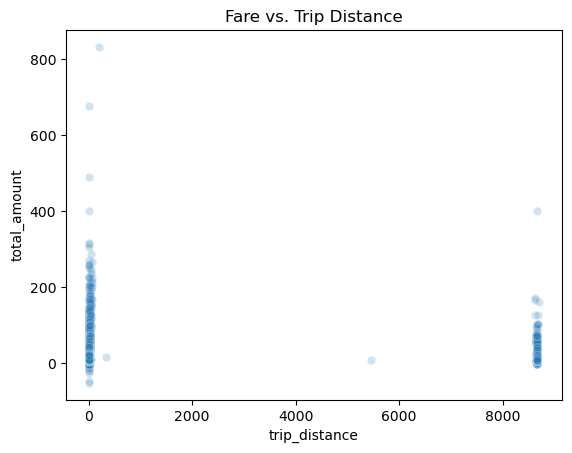

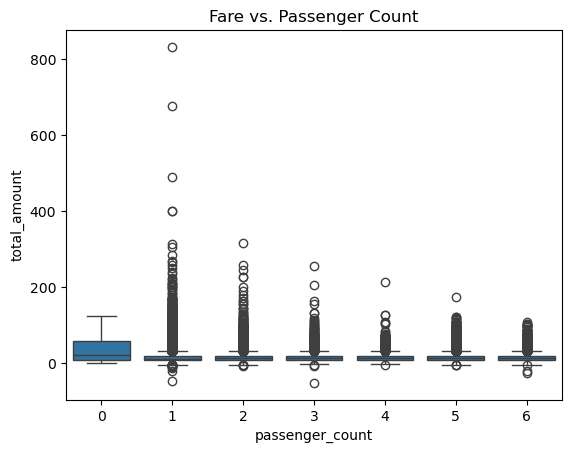

In [66]:
sns.scatterplot(x='trip_distance', y='total_amount', data=data, alpha=0.2)
plt.title('Fare vs. Trip Distance')
plt.show()

sns.boxplot(x='passenger_count', y='total_amount', data=data)
plt.title('Fare vs. Passenger Count')
plt.show()

Removing Outliers

1. Removing the rows whose trip distance is above
 300

In [67]:
# Find rows where trip_distance > 8000
high_distance_trips = data[data['trip_distance'] > 300]

# Print the results
print(f"Number of trips with distance > 300: {len(high_distance_trips)}")
print(high_distance_trips)

# Save as separate dataframe
high_distance_df = high_distance_trips.copy()

Number of trips with distance > 300: 540
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6              2  2016-03-01 00:00:00   2016-03-01 00:00:00                6   
434            2  2016-03-10 07:08:57   2016-03-10 07:09:03                6   
1337           2  2016-03-10 07:14:48   2016-03-10 07:14:58                1   
1457           2  2016-03-10 07:15:34   2016-03-10 07:15:36                5   
5196           2  2016-03-10 07:37:32   2016-03-10 07:37:40                6   
...          ...                  ...                   ...              ...   
211574         1  2016-03-01 12:13:08   2016-03-01 12:21:40                1   
211663         1  2016-03-01 12:13:23   2016-03-01 12:13:23                1   
211810         1  2016-03-01 12:13:55   2016-03-01 12:13:55                1   
211927         1  2016-03-01 12:14:18   2016-03-01 12:30:49                1   
211954         1  2016-03-01 12:14:24   2016-03-01 12:26:26                1   

In [68]:
data.drop(data[data['trip_distance'] > 300].index, inplace=True)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,total_amount,trip_distance,pickup_datetime,pickup_datetime_edt,pickup_day,is_weekend,pickup_hour,am_pm,is_night,is_rush_hour
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,12.35,3.138096,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,15.35,4.303331,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,63.80,16.600142,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,41.62,9.046547,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,113.80,20.400022,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,20.16,3.806279,2016-03-01 12:15:37,2016-03-01 07:15:37-05:00,Tuesday,False,7,AM,0,1
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,18.30,3.496576,2016-03-01 12:15:37,2016-03-01 07:15:37-05:00,Tuesday,False,7,AM,0,1
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,4.80,0.580119,2016-03-01 12:15:37,2016-03-01 07:15:37-05:00,Tuesday,False,7,AM,0,1
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,7.80,1.555737,2016-03-01 12:15:38,2016-03-01 07:15:38-05:00,Tuesday,False,7,AM,0,1


Removing the rows which 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount' is lesser than or equal to zero

In [69]:
# Remove rows where any of the specified columns are <= 0
columns_to_check = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']

# Keep only rows where ALL specified columns are > 0
data = data[(data['fare_amount'] > 0) & 
            (data['extra'] >= 0) & 
            (data['mta_tax'] >= 0) & 
            (data['tip_amount'] >= 0) & 
            (data['tolls_amount'] >= 0)]

print(f"Shape after removing rows with <= 0 values: {data.shape}")

Shape after removing rows with <= 0 values: (211664, 27)


In [70]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,total_amount,trip_distance,pickup_datetime,pickup_datetime_edt,pickup_day,is_weekend,pickup_hour,am_pm,is_night,is_rush_hour
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,12.35,3.138096,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,15.35,4.303331,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,63.80,16.600142,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,41.62,9.046547,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,113.80,20.400022,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,Monday,False,19,PM,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,20.16,3.806279,2016-03-01 12:15:37,2016-03-01 07:15:37-05:00,Tuesday,False,7,AM,0,1
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,18.30,3.496576,2016-03-01 12:15:37,2016-03-01 07:15:37-05:00,Tuesday,False,7,AM,0,1
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,4.80,0.580119,2016-03-01 12:15:37,2016-03-01 07:15:37-05:00,Tuesday,False,7,AM,0,1
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,7.80,1.555737,2016-03-01 12:15:38,2016-03-01 07:15:38-05:00,Tuesday,False,7,AM,0,1


Outlier detection

In [71]:
Q1 = data['total_amount'].quantile(0.25)
Q3 = data['total_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['total_amount'] < (Q1 - 1.5 * IQR)) | (data['total_amount'] > (Q3 + 1.5 * IQR))]
print('Number of fare outliers:', outliers.shape[0])

Number of fare outliers: 18699


In [72]:
data = data[(data['total_amount'] >= (Q1 - 1.5 * IQR)) & (data['total_amount'] <= (Q3 + 1.5 * IQR))]

Removing the unused columns and non numeric columns like: 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'store_and_fwd_flag', 'pickup_datetime', 'pickup_datetime_edt'

In [73]:
# List of columns to remove
columns_to_remove = [
    'tpep_pickup_datetime', 
    'tpep_dropoff_datetime', 
    'pickup_longitude', 
    'pickup_latitude', 
    'store_and_fwd_flag', 
    'pickup_datetime', 
    'pickup_datetime_edt'
]

# Check which columns actually exist in the dataframe
existing_columns_to_remove = [col for col in columns_to_remove if col in data.columns]
print(f"Columns that exist and will be removed: {existing_columns_to_remove}")

# Remove the existing columns
data = data.drop(columns=existing_columns_to_remove)

print(f"Shape after removing columns: {data.shape}")
print(f"Remaining columns: {list(data.columns)}")

Columns that exist and will be removed: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'store_and_fwd_flag', 'pickup_datetime', 'pickup_datetime_edt']
Shape after removing columns: (192965, 20)
Remaining columns: ['VendorID', 'passenger_count', 'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_distance', 'pickup_day', 'is_weekend', 'pickup_hour', 'am_pm', 'is_night', 'is_rush_hour']


Fix Skewness

In [74]:
data['fare_amount_log'] = np.log1p(data['fare_amount'])
data['trip_distance_log'] = np.log1p(data['trip_distance'])

Encode Categorical Variables

In [75]:
data.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'dropoff_longitude',
       'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance', 'pickup_day', 'is_weekend', 'pickup_hour', 'am_pm',
       'is_night', 'is_rush_hour', 'fare_amount_log', 'trip_distance_log'],
      dtype='object')

In [76]:
import sklearn

In [77]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder objects for each categorical column
label_encoders = {}

categorical_columns = ['am_pm', 'pickup_day', 'is_weekend', 'is_night', 'is_rush_hour']

for column in categorical_columns:
    if column in data.columns:
        le = LabelEncoder()
        data[column + '_encoded'] = le.fit_transform(data[column])
        label_encoders[column] = le
        # Remove the original column
        data = data.drop(columns=[column])

print("Label encoding completed!")
print(f"Shape after label encoding: {data.shape}")

Label encoding completed!
Shape after label encoding: (192965, 22)


In [78]:
data.head(5)

,VendorID,passenger_count,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,...,total_amount,trip_distance,pickup_hour,fare_amount_log,trip_distance_log,am_pm_encoded,pickup_day_encoded,is_weekend_encoded,is_night_encoded,is_rush_hour_encoded
0,1,1,1,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,...,12.35,3.138096,19,2.302585,1.420236,1,0,0,0,1
1,1,1,1,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,...,15.35,4.303331,19,2.484907,1.668335,1,0,0,0,1
5,2,5,1,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,...,30.36,6.502273,19,3.198673,2.015206,1,0,0,0,1
7,1,1,1,-73.829208,40.712345,3,20.5,0.5,0.5,0.00,...,21.80,7.950066,19,3.068053,2.191661,1,0,0,0,1
8,1,1,1,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,...,8.80,0.837395,19,1.871802,0.608349,1,0,0,0,1


In [79]:
# List of columns to remove
columns_to_remove = [
    'dropoff_longitude','dropoff_latitude'
]

# Check which columns actually exist in the dataframe
existing_columns_to_remove = [col for col in columns_to_remove if col in data.columns]
print(f"Columns that exist and will be removed: {existing_columns_to_remove}")

# Remove the existing columns
data = data.drop(columns=existing_columns_to_remove)

print(f"Shape after removing columns: {data.shape}")
print(f"Remaining columns: {list(data.columns)}")

Columns that exist and will be removed: ['dropoff_longitude', 'dropoff_latitude']
Shape after removing columns: (192965, 20)
Remaining columns: ['VendorID', 'passenger_count', 'RatecodeID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_distance', 'pickup_hour', 'fare_amount_log', 'trip_distance_log', 'am_pm_encoded', 'pickup_day_encoded', 'is_weekend_encoded', 'is_night_encoded', 'is_rush_hour_encoded']


In [80]:
data = data.drop(columns=['fare_amount', 'trip_distance'])

In [81]:
data

,VendorID,passenger_count,RatecodeID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,fare_amount_log,trip_distance_log,am_pm_encoded,pickup_day_encoded,is_weekend_encoded,is_night_encoded,is_rush_hour_encoded
0,1,1,1,1,0.5,0.5,2.05,0.0,0.3,12.35,19,2.302585,1.420236,1,0,0,0,1
1,1,1,1,1,0.5,0.5,3.05,0.0,0.3,15.35,19,2.484907,1.668335,1,0,0,0,1
5,2,5,1,1,1.0,0.5,5.06,0.0,0.3,30.36,19,3.198673,2.015206,1,0,0,0,1
7,1,1,1,3,0.5,0.5,0.00,0.0,0.3,21.80,19,3.068053,2.191661,1,0,0,0,1
8,1,1,1,1,0.5,0.5,2.00,0.0,0.3,8.80,19,1.871802,0.608349,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,1,1,1,0.0,0.5,3.36,0.0,0.3,20.16,7,2.833213,1.569923,0,2,0,0,1
212341,2,1,1,1,0.0,0.5,2.00,0.0,0.3,18.30,7,2.803360,1.503316,0,2,0,0,1
212342,2,1,1,1,0.0,0.5,0.00,0.0,0.3,4.80,7,1.609438,0.457500,0,2,0,0,1
212343,1,2,1,2,0.0,0.5,0.00,0.0,0.3,7.80,7,2.079442,0.938340,0,2,0,0,1


Feature Selection

In [82]:
data.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'payment_type', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'pickup_hour', 'fare_amount_log', 'trip_distance_log',
       'am_pm_encoded', 'pickup_day_encoded', 'is_weekend_encoded',
       'is_night_encoded', 'is_rush_hour_encoded'],
      dtype='object')

In [83]:
# List of columns to remove
columns_to_remove = ['fare_amount_log', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge','RatecodeID'
]

# Check which columns actually exist in the dataframe
existing_columns_to_remove = [col for col in columns_to_remove if col in data.columns]
print(f"Columns that exist and will be removed: {existing_columns_to_remove}")

# Remove the existing columns
data = data.drop(columns=existing_columns_to_remove)

print(f"Shape after removing columns: {data.shape}")
print(f"Remaining columns: {list(data.columns)}")

Columns that exist and will be removed: ['fare_amount_log', 'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'RatecodeID']
Shape after removing columns: (192965, 10)
Remaining columns: ['VendorID', 'passenger_count', 'total_amount', 'pickup_hour', 'trip_distance_log', 'am_pm_encoded', 'pickup_day_encoded', 'is_weekend_encoded', 'is_night_encoded', 'is_rush_hour_encoded']


In [84]:
data.columns

Index(['VendorID', 'passenger_count', 'total_amount', 'pickup_hour',
       'trip_distance_log', 'am_pm_encoded', 'pickup_day_encoded',
       'is_weekend_encoded', 'is_night_encoded', 'is_rush_hour_encoded'],
      dtype='object')

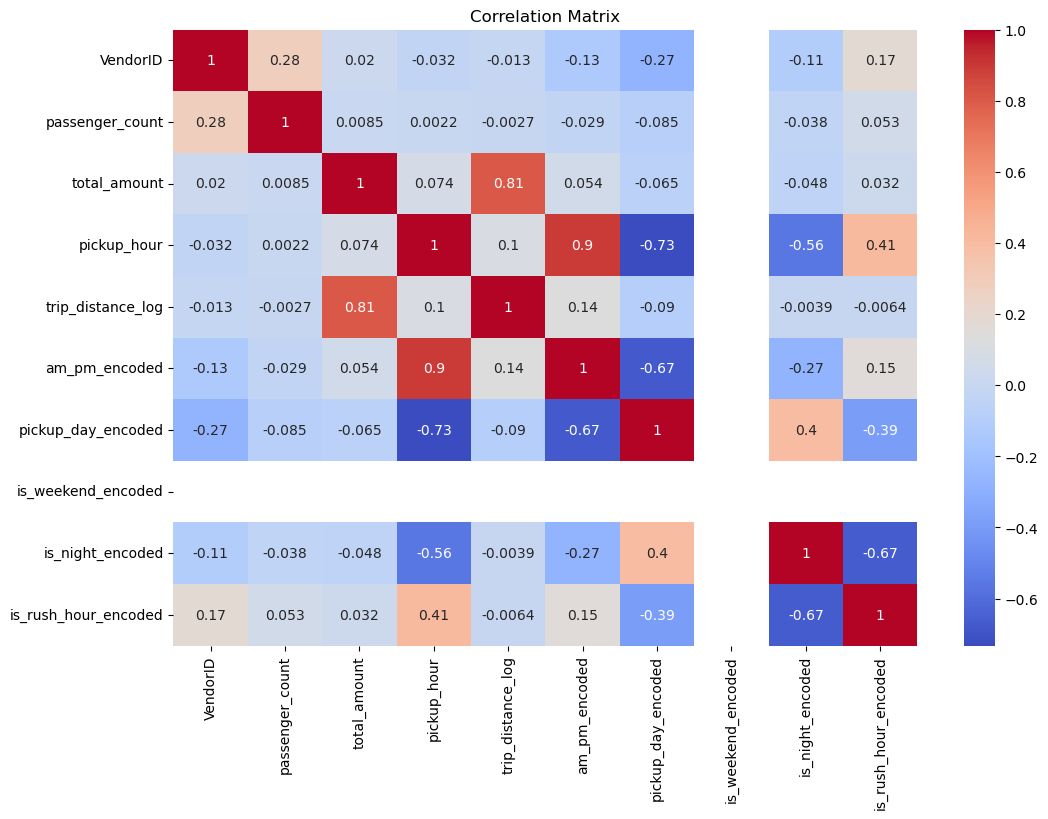

In [85]:
corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

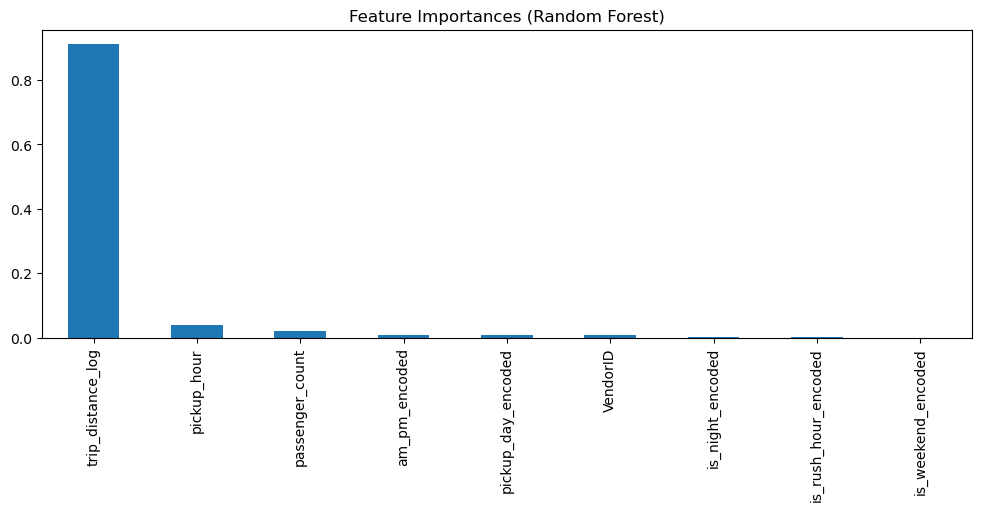

In [86]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop('total_amount', axis = 1)
y = data['total_amount']

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(12,4), title='Feature Importances (Random Forest)')
plt.show()

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }
print(pd.DataFrame(results).T)


                        R2        MSE      RMSE       MAE
GradientBoosting  0.750995   7.809192  2.794493  2.042566
RandomForest      0.694320   9.586607  3.096225  2.278727
LinearRegression  0.667994  10.412236  3.226800  2.308958


In [89]:
import joblib
joblib.dump(model, 'modelFinal.pkl')


['modelFinal.pkl']